<font size = 7>EXTRACTION PHASE</font>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("RT_IOT2022.csv")

df.head()

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


<font size = 7>TRASNFORMATION PHASE</font>

In [14]:
#chech the datatype so the columns of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no                        123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [21]:
# Check if there are columns that has null values
df.isnull().sum()

no                      0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

In [35]:
# Check columns of the dataframe to check if there are columns that have same name or duplicated
df.columns

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

In [44]:
#check the shape of the dataframe
# to check the total rows and total columns of the dataset
df.shape

(123117, 85)

<font size = 7>LOAD PHASE</font>

In [53]:
# create a copy of the dataset the to avoid overwritting the initial data of the dataframe and we can freely modify our dataset safely.
df_copy = df.copy()

<font size = 5>What is the distribution of the Attack_type classes (normal vs. various attacks), and what percentage of the 123,117 instances does each class comprise?</font>

In [59]:
df_copy.head()

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [61]:
graph1 = df_copy['Attack_type'].value_counts(normalize = True)

In [63]:
graph1

Attack_type
DOS_SYN_Hping                 0.768854
Thing_Speak                   0.065856
ARP_poisioning                0.062948
MQTT_Publish                  0.033675
NMAP_UDP_SCAN                 0.021037
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008139
DDOS_Slowloris                0.004337
Wipro_bulb                    0.002055
Metasploit_Brute_Force_SSH    0.000301
NMAP_FIN_SCAN                 0.000227
Name: proportion, dtype: float64

For the execution of the piechart
- to keep the piechart organized, we sum up the lesser value or percentages of attack type in the distribution
- to make this happen we set a treshhold of 1 percent

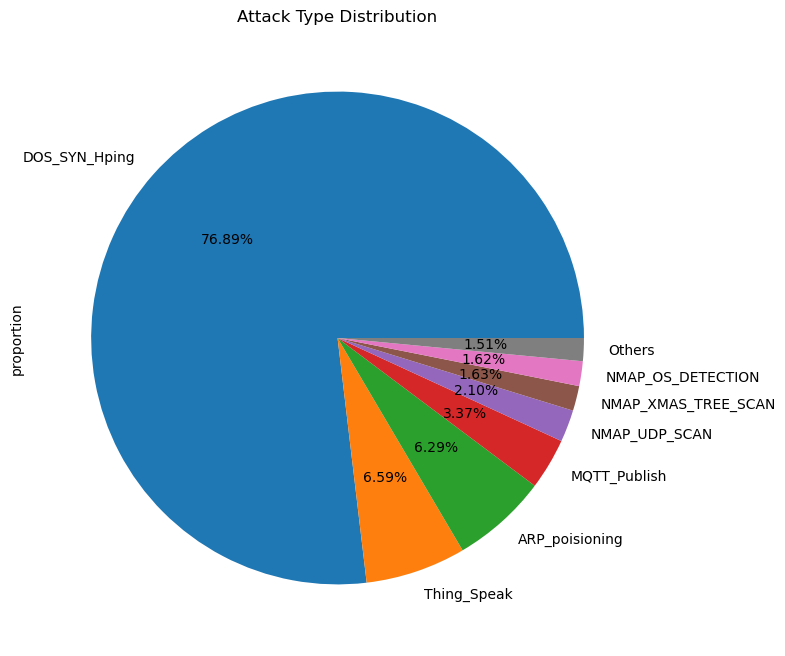

In [91]:
graph1 = df['Attack_type'].value_counts(normalize=True) * 100
threshold = 1
big = graph1[graph1 >= threshold]
small = graph1[graph1 < threshold]
big['Others'] = small.sum()

big.plot(kind='pie', figsize=(12, 8), labeldistance=1.1, autopct='%1.2f%%')
plt.title("Attack Type Distribution")
plt.show()

<font size = 5>How do the categorical features proto (protocol) and service vary across different attack types and normal traffic patterns? Links to an external site.</font>

In [105]:
# this shows the unique values of the column service
df_copy['service'].unique()

array(['mqtt', '-', 'http', 'dns', 'ntp', 'ssl', 'dhcp', 'irc', 'ssh',
       'radius'], dtype=object)

In [107]:
# this shows the unique values of the column proto
df_copy['proto'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [127]:
ser_proto = df_copy.groupby(['Attack_type'])[['service','proto']].value_counts()

In [129]:
ser_proto

Attack_type                 service  proto
ARP_poisioning              dns      udp       5458
                            ssl      tcp       1459
                            -        udp        324
                                     tcp        214
                            http     tcp        129
                            dns      tcp        125
                            dhcp     udp         26
                            -        icmp         8
                            ntp      udp          7
DDOS_Slowloris              http     tcp        523
                            -        tcp          6
                            dns      udp          3
                            dhcp     udp          2
DOS_SYN_Hping               -        tcp      94659
MQTT_Publish                mqtt     tcp       4132
                            -        tcp         11
                            http     tcp          3
Metasploit_Brute_Force_SSH  ssh      tcp         28
                     

In [124]:
# get the service and protocol used of the top 3 most common attacks

# first we get top 3 attack types and insert it into a list for the loop 
top3 = list(graph1.nlargest(3).index)

In [138]:
collect_top3 = df_copy.query(f'Attack_type == {top3}')[['Attack_type','service','proto']]
collect_top3

,Attack_type,service,proto
4146,Thing_Speak,http,tcp
4147,Thing_Speak,dns,udp
4148,Thing_Speak,http,tcp
4149,Thing_Speak,dns,udp
4150,Thing_Speak,http,tcp
...,...,...,...
115445,DOS_SYN_Hping,-,tcp
115446,DOS_SYN_Hping,-,tcp
115447,DOS_SYN_Hping,-,tcp
115448,DOS_SYN_Hping,-,tcp


In [176]:
collect_top3.set_index('Attack_type')

,service,proto
Attack_type,,
Thing_Speak,http,tcp
Thing_Speak,dns,udp
Thing_Speak,http,tcp
Thing_Speak,dns,udp
Thing_Speak,http,tcp
...,...,...
DOS_SYN_Hping,-,tcp
DOS_SYN_Hping,-,tcp
DOS_SYN_Hping,-,tcp


In [233]:
graph4 = collect_top3.groupby(['Attack_type'])['proto'].value_counts()

#graph4.plot(kind = 'bar', y = graph4['proto'], x = graph4.index)
graph4


Attack_type     proto
ARP_poisioning  udp       5815
                tcp       1927
                icmp         8
DOS_SYN_Hping   tcp      94659
Thing_Speak     udp       4284
                tcp       3779
                icmp        45
Name: count, dtype: int64

In [206]:
graph2 = collect_top3.groupby(['Attack_type'])['service'].value_counts()
graph2

Attack_type     service
ARP_poisioning  dns         5583
                ssl         1459
                -            546
                http         129
                dhcp          26
                ntp            7
DOS_SYN_Hping   -          94659
Thing_Speak     dns         4069
                http        2667
                ssl         1097
                -            151
                ntp          110
                dhcp          14
Name: count, dtype: int64

In [213]:
graph3 = collect_top3.groupby(['Attack_type'])['proto'].value_counts()
graph3

Attack_type     proto
ARP_poisioning  udp       5815
                tcp       1927
                icmp         8
DOS_SYN_Hping   tcp      94659
Thing_Speak     udp       4284
                tcp       3779
                icmp        45
Name: count, dtype: int64

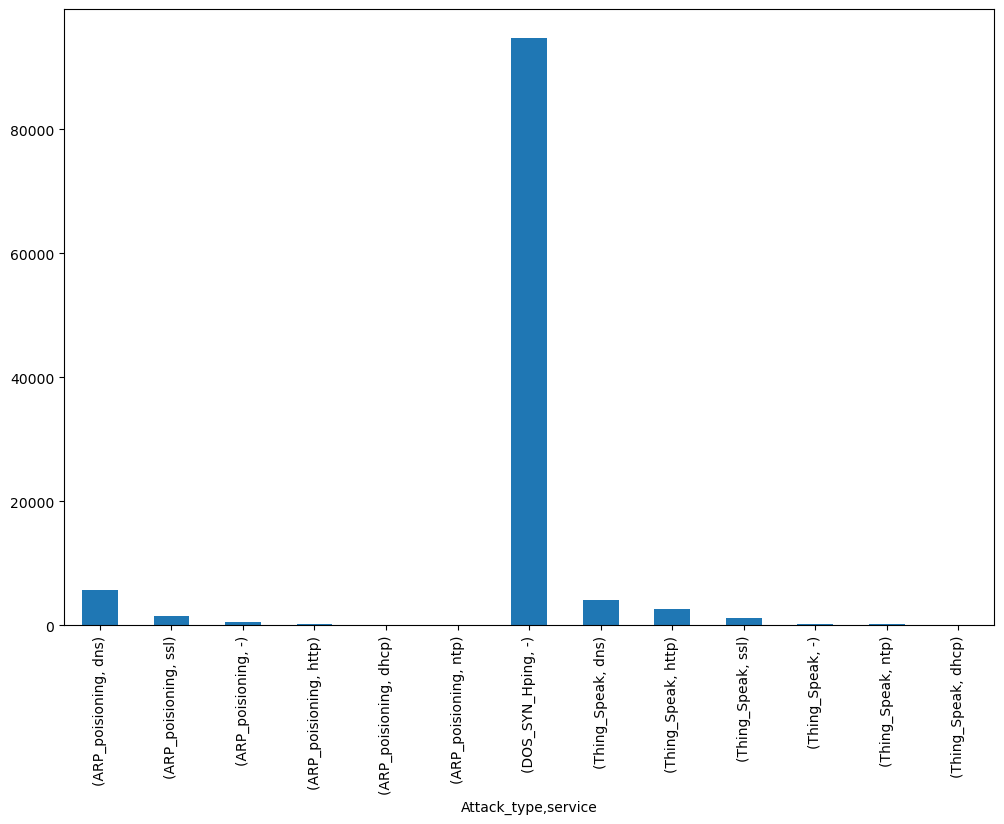

In [243]:
graph2.plot(kind = "bar", figsize = (12,8))
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

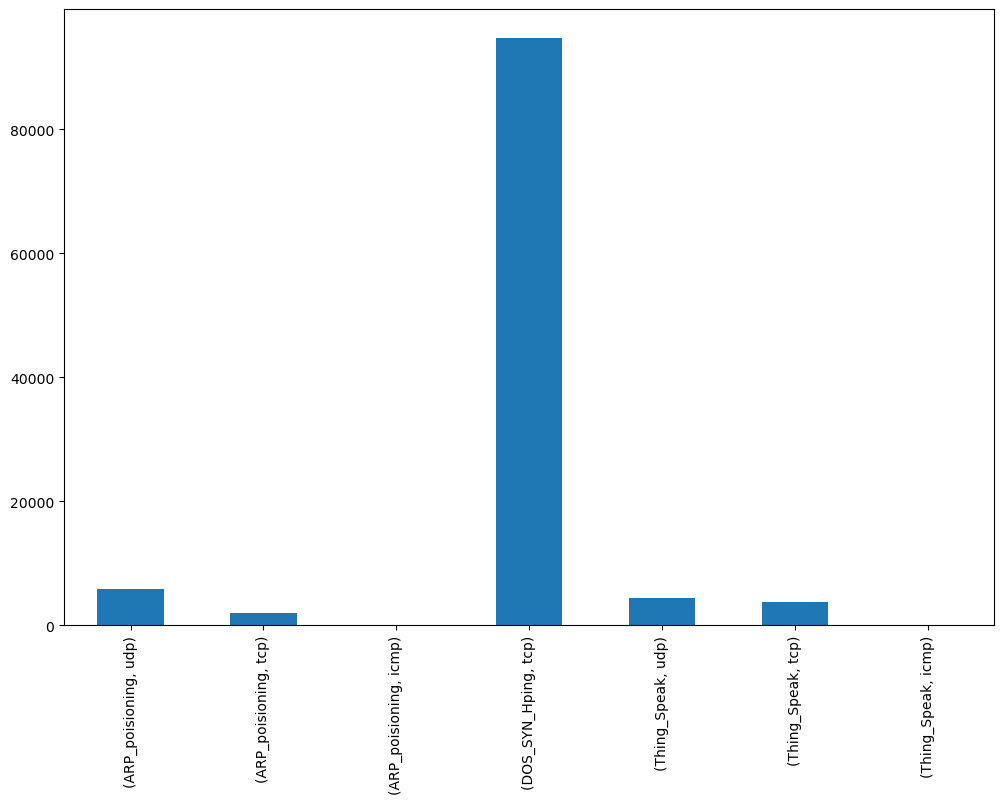

In [275]:
graph3.plot(kind = "bar", figsize = (12,8))
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [291]:
# base on count we observe that attack_Type DOS_SYN_Hping always dont have a captured service

df_copy[(df_copy['Attack_type'] == 'DOS_SYN_Hping') & (df_copy['service'] == '-')].describe()

,no,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,94659.000000,94659.000000,94659.0,94659.000000,94659.0,94659.000000,94659.0,94659.0,9.465900e+04,9.465900e+04,...,94659.000000,94659.0,94659.0,94659.0,94659.0,94659.0,94659.0,94659.0,94659.0,94659.0
mean,47329.000000,30748.834892,21.0,0.000003,1.0,0.897633,1.0,0.0,4.447962e+05,4.447962e+05,...,2.727020,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
std,27325.843903,19411.496837,0.0,0.000002,0.0,0.303133,0.0,0.0,3.689500e+05,3.689500e+05,...,1.942489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,21.0,0.000000,1.0,0.000000,1.0,0.0,0.000000e+00,0.000000e+00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
25%,23664.500000,12808.500000,21.0,0.000001,1.0,1.000000,1.0,0.0,1.997288e+05,1.997288e+05,...,0.953674,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
50%,47329.000000,30201.000000,21.0,0.000003,1.0,1.000000,1.0,0.0,2.467238e+05,2.467238e+05,...,3.099442,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
75%,70993.500000,47621.500000,21.0,0.000004,1.0,1.000000,1.0,0.0,8.388608e+05,8.388608e+05,...,4.053116,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
max,94658.000000,65535.000000,21.0,0.000045,1.0,1.000000,1.0,0.0,1.048576e+06,1.048576e+06,...,45.061111,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0


<font size= 5>What are the mean and standard deviation of flow_duration for each Attack_type, and are differences statistically significant?</font>

In [253]:
# by analyzing the statistical summary of flow_duration of every attack type
# we can determine if there are outliers in our data siply by comparing the mean,min,std, and max
# we this we can determine if the data is sparse or close
df_copy.groupby(['Attack_type'])['flow_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Attack_type,,,,,,,,
ARP_poisioning,7750.0,15.893538,108.261070,0.000000,0.000000,0.000637,0.307533,5341.392332
DDOS_Slowloris,534.0,14.699148,14.124797,0.000000,0.003817,20.088963,30.557698,30.870463
DOS_SYN_Hping,94659.0,0.000003,0.000002,0.000000,0.000001,0.000003,0.000004,0.000045
MQTT_Publish,4146.0,43.397013,24.341563,0.000000,30.022991,44.067645,61.973033,353.112391
Metasploit_Brute_Force_SSH,37.0,3.006557,5.210286,0.000000,1.417588,2.030317,2.258765,29.289262
NMAP_FIN_SCAN,28.0,0.023614,0.108791,0.000000,0.000000,0.000000,0.000000,0.575884
NMAP_OS_DETECTION,2000.0,0.000008,0.000007,0.000001,0.000005,0.000006,0.000007,0.000048
NMAP_TCP_scan,1002.0,0.000019,0.000269,0.000001,0.000002,0.000004,0.000005,0.005989
NMAP_UDP_SCAN,2590.0,0.737766,24.909755,0.000000,0.000000,0.000000,0.000000,905.964201


C:\Users\kurt\AppData\Local\Temp\ipykernel_14212\3912273532.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing Attack_type by flow_duration')

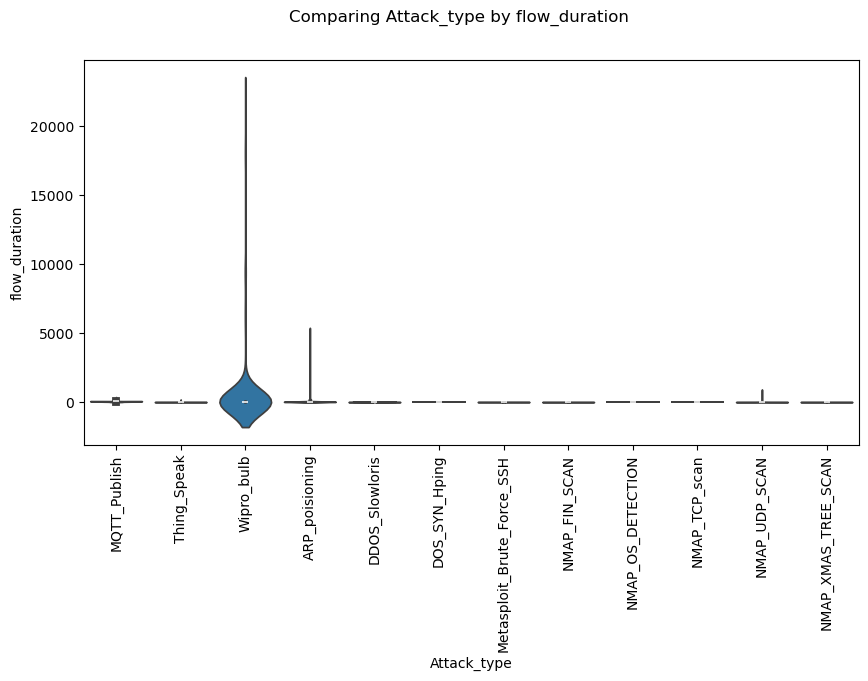

In [255]:
# for the visualization lets check it using the violin graph

fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
x='Attack_type', y='flow_duration', data=df_copy[['Attack_type', 'flow_duration']],
ax=axes, scale='width')
plt.xticks(rotation = 90)
plt.suptitle('Comparing Attack_type by flow_duration')

<font size = 5>Which continuous features (e.g., fwd_pkts_per_sec, bwd_pkts_per_sec, payload_bytes_per_second) exhibit the highest correlation with specific attack classes?</font>

In [264]:
# creating another copy for trial and error
correlation = df_copy.copy()

In [266]:
# For the most common attack which is the DOS_SYN_Hping attack we observe that the following 
# variable have positive correlation to the most common attack type


correlation['is_DOS_SYN_Hping'] = (correlation['Attack_type'] == 'DOS_SYN_Hping').astype(int)
cor = correlation[['fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'payload_bytes_per_second', 'is_DOS_SYN_Hping']].corr()
test = cor.tail(1)

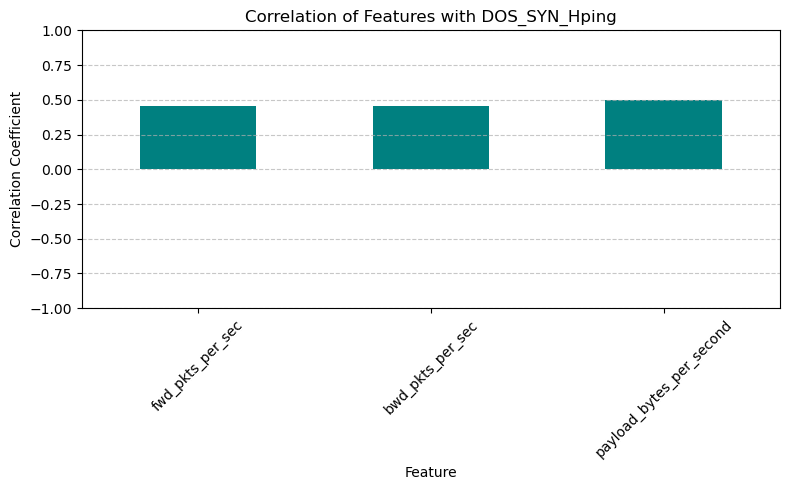

In [269]:
row = cor.loc['is_DOS_SYN_Hping'].drop('is_DOS_SYN_Hping')


plt.figure(figsize=(8, 5))
row.plot(kind='bar', color='teal')
plt.title("Correlation of Features with DOS_SYN_Hping")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

<font size =5>How do time‑based features like fwd_iat.avg and bwd_iat.avg (mean inter‑arrival times) differ between various attack types and normal traffic?</font>

In [298]:
time_avg = df_copy[['fwd_iat.avg','bwd_iat.avg','Attack_type']]

In [301]:
time_avg

,fwd_iat.avg,bwd_iat.avg,Attack_type
0,4.001450e+06,506597.757339,MQTT_Publish
1,3.985448e+06,469065.248966,MQTT_Publish
2,4.015507e+06,503442.466259,MQTT_Publish
3,3.995133e+06,470946.013927,MQTT_Publish
4,3.987795e+06,483996.033669,MQTT_Publish
...,...,...,...
123112,0.000000e+00,0.000000,NMAP_XMAS_TREE_SCAN
123113,0.000000e+00,0.000000,NMAP_XMAS_TREE_SCAN
123114,0.000000e+00,0.000000,NMAP_XMAS_TREE_SCAN
123115,0.000000e+00,0.000000,NMAP_XMAS_TREE_SCAN


In [304]:
time_avg.groupby(['Attack_type'])[['fwd_iat.avg','bwd_iat.avg']].describe()

fwd_iat.avg                                   \
                                 count          mean           std  min   
Attack_type                                                               
ARP_poisioning                  7750.0  7.443455e+05  6.080604e+06  0.0   
DDOS_Slowloris                   534.0  2.660823e+06  2.505477e+06  0.0   
DOS_SYN_Hping                  94659.0  0.000000e+00  0.000000e+00  0.0   
MQTT_Publish                    4146.0  4.941675e+06  2.703778e+06  0.0   
Metasploit_Brute_Force_SSH        37.0  4.313227e+05  1.071899e+06  0.0   
NMAP_FIN_SCAN                     28.0  4.114728e+03  2.176702e+04  0.0   
NMAP_OS_DETECTION               2000.0  0.000000e+00  0.000000e+00  0.0   
NMAP_TCP_scan                   1002.0  7.311979e+00  1.345700e+02  0.0   
NMAP_UDP_SCAN                   2590.0  1.436467e+04  4.294105e+05  0.0   
NMAP_XMAS_TREE_SCAN             2010.0  1.874295e+02  8.402341e+03  0.0   
Thing_Speak                     8108.0  1.186232e+05  8.328482e+05  0.0   
Wipro_bulb                       253.0  2.093047e+06  7.004656e+06  0.0   

                                                                      \
                                     25%           50%           75%   
Attack_type                                                            
ARP_poisioning              0.000000e+00  8.106232e+00  3.036066e+04   
DDOS_Slowloris              1.263877e+03  4.362737e+06  5.107711e+06   
DOS_SYN_Hping               0.000000e+00  0.000000e+00  0.000000e+00   
MQTT_Publish                3.439565e+06  5.009167e+06  6.886319e+06   
Metasploit_Brute_Force_SSH  1.096741e+05  1.480301e+05  1.706666e+05   
NMAP_FIN_SCAN               0.000000e+00  0.000000e+00  0.000000e+00   
NMAP_OS_DETECTION           0.000000e+00  0.000000e+00  0.000000e+00   
NMAP_TCP_scan               0.000000e+00  0.000000e+00  0.000000e+00   
NMAP_UDP_SCAN               0.000000e+00  0.000000e+00  0.000000e+00   
NMAP_XMAS_TREE_SCAN         0.000000e+00  0.000000e+00  0.000000e+00   
Thing_Speak                 2.729893e+02  4.441249e+04  1.242706e+05   
Wipro_bulb                  0.000000e+00  9.106379e+04  1.859183e+06   

                                         bwd_iat.avg                \
                                     max       count          mean   
Attack_type                                                          
ARP_poisioning              3.002526e+08      7750.0  7.664256e+05   
DDOS_Slowloris              6.103740e+06       534.0  2.523958e+06   
DOS_SYN_Hping               0.000000e+00     94659.0  0.000000e+00   
MQTT_Publish                3.923471e+07      4146.0  5.222072e+05   
Metasploit_Brute_Force_SSH  4.313726e+06        37.0  9.100383e+05   
NMAP_FIN_SCAN               1.151814e+05        28.0  6.539123e+03   
NMAP_OS_DETECTION           0.000000e+00      2000.0  0.000000e+00   
NMAP_TCP_scan               2.994537e+03      1002.0  0.000000e+00   
NMAP_UDP_SCAN               2.067726e+07      2590.0  1.786866e+02   
NMAP_XMAS_TREE_SCAN         3.767023e+05      2010.0  1.716461e+02   
Thing_Speak                 4.351004e+07      8108.0  9.726068e+04   
Wipro_bulb                  9.104470e+07       253.0  2.037756e+06   

                                                                            \
                                     std  min            25%           50%   
Attack_type                                                                  
ARP_poisioning              3.813601e+06  0.0       0.000000  1.041889e+02   
DDOS_Slowloris              2.760618e+06  0.0    1784.354448  2.563950e+06   
DOS_SYN_Hping               0.000000e+00  0.0       0.000000  0.000000e+00   
MQTT_Publish                1.378185e+06  0.0  383927.249909  3.996923e+05   
Metasploit_Brute_Force_SSH  4.747146e+06  0.0  106390.496095  1.665667e+05   
NMAP_FIN_SCAN               2.776590e+04  0.0       0.000000  0.000000e+00   
NMAP_OS_DETECTION           0.000000e+00  0.0       0.000000  0.000

In [309]:
indexer = time_avg.groupby(['Attack_type'])[['fwd_iat.avg','bwd_iat.avg']].describe()
picked_attacks = list(indexer.index)
traffic_check = df_copy.query(f'Attack_type == {picked_attacks} ')
graph1 = traffic_check.groupby(['Attack_type'])[['fwd_iat.avg','bwd_iat.avg']].mean()

In [311]:
graph1

,fwd_iat.avg,bwd_iat.avg
Attack_type,,
ARP_poisioning,7.443455e+05,7.664256e+05
DDOS_Slowloris,2.660823e+06,2.523958e+06
DOS_SYN_Hping,0.000000e+00,0.000000e+00
MQTT_Publish,4.941675e+06,5.222072e+05
Metasploit_Brute_Force_SSH,4.313227e+05,9.100383e+05
NMAP_FIN_SCAN,4.114728e+03,6.539123e+03
NMAP_OS_DETECTION,0.000000e+00,0.000000e+00
NMAP_TCP_scan,7.311979e+00,0.000000e+00
NMAP_UDP_SCAN,1.436467e+04,1.786866e+02


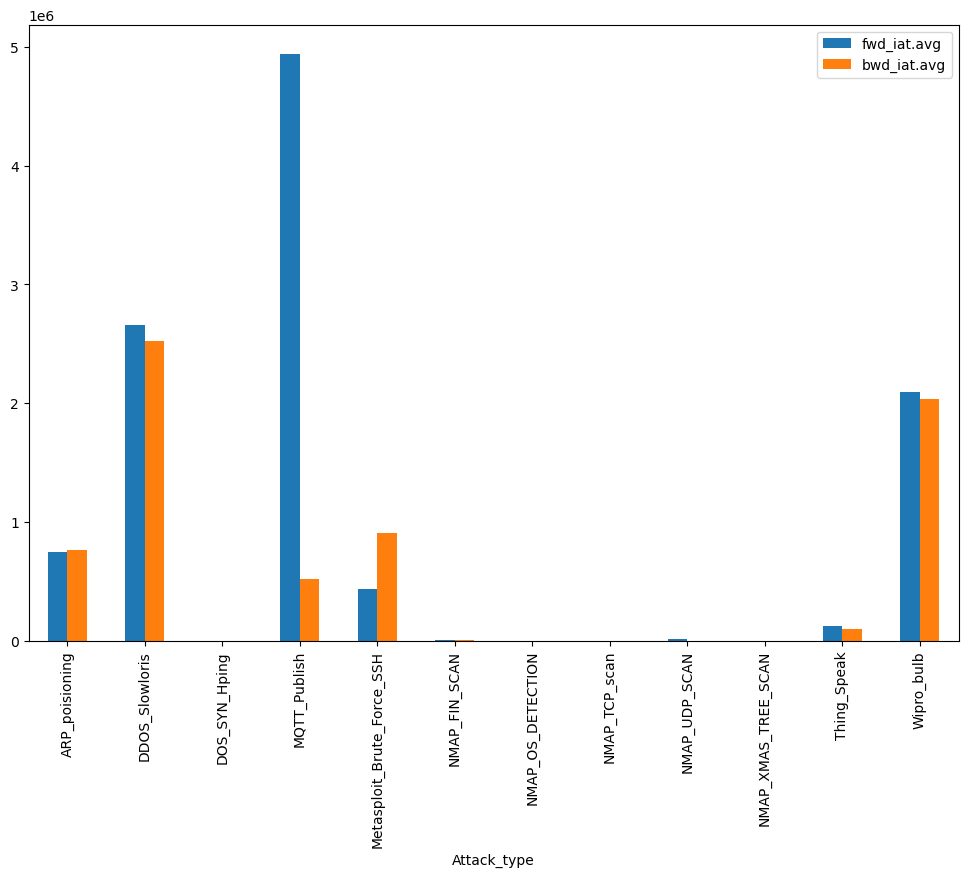

In [314]:
graph1.plot(kind = 'bar', figsize = (12,8))
plt.show()

<font size =5>Which network flag counts (e.g., flow_SYN_flag_count, flow_RST_flag_count, fwd_PSH_flag_count) are most indicative of specific intrusion patterns?</font>

In [322]:
flag_features = [col for col in df_copy.columns if '_flag_count' in col]

In [324]:
flag_features

['flow_FIN_flag_count',
 'flow_SYN_flag_count',
 'flow_RST_flag_count',
 'fwd_PSH_flag_count',
 'bwd_PSH_flag_count',
 'flow_ACK_flag_count',
 'fwd_URG_flag_count',
 'bwd_URG_flag_count',
 'flow_CWR_flag_count',
 'flow_ECE_flag_count']

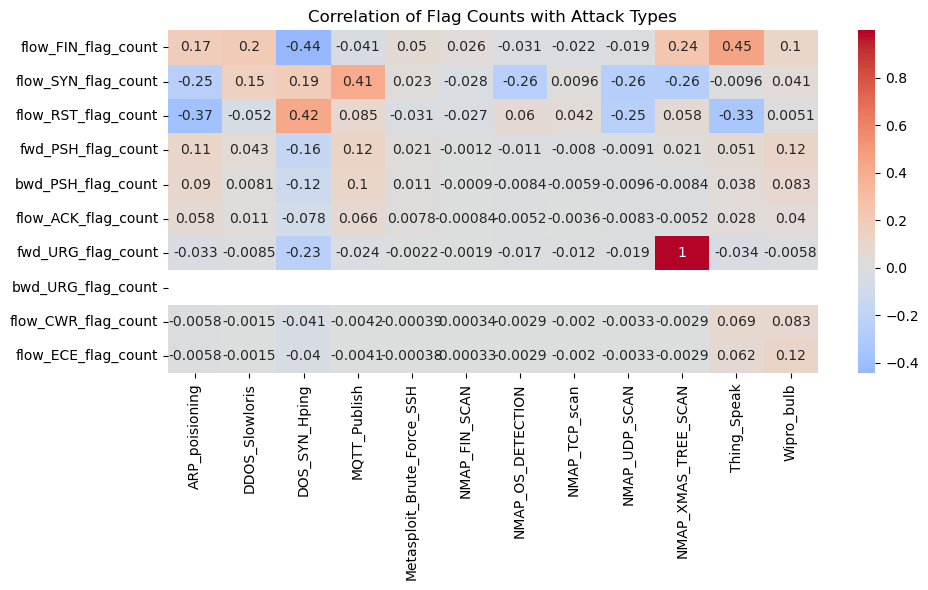

In [327]:
correlation_matrix = pd.DataFrame()

for attack in picked_attacks:
    df[f'is_{attack}'] = (df['Attack_type'] == attack).astype(int)
    temp_cor = df[flag_features + [f'is_{attack}']].corr().loc[flag_features, f'is_{attack}']
    correlation_matrix[attack] = temp_cor

# Plot it
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Flag Counts with Attack Types")
plt.tight_layout()
plt.show()